# HW4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ranksums, norm, rankdata, ttest_ind, spearmanr

## Pre Processing

In [2]:
with open('AMI_GSE66360_series_matrix.csv') as f:
    #clean all first 59 lines. not relevant. include only the first 2 rows: class and ID. read file into df_info
    df_info = pd.read_csv(f, header=None, skiprows=59, nrows=2)
    
with open('AMI_GSE66360_series_matrix.csv') as f:
    #clean all first 60 lines. not relevant. don't know the class_ID, only the genes rates.
    df_genes = pd.read_csv(f, header=None, skiprows=61)
    

df_info.set_index(0, inplace=True)
df_genes.set_index(0, inplace=True)
df = pd.concat([df_info.transpose(), df_genes.transpose()], axis=1)

#unite the 2 table and set the order by ID (patient)
df.set_index('ID_REF', inplace=True)

df.head()

,Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,H,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
GSM1620820,H,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
GSM1620821,H,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
GSM1620822,H,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,...,13.490226,13.494827,14.754124,14.363296,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
GSM1620823,H,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649


In [3]:

genes = df.columns[1:]

## A1

In [4]:
print 'Number of genes: ', len(genes)

Number of genes:  54675


## A2

In [5]:
print 'Number of patients: ', len(df)

Number of patients:  99


## A3

In [6]:
print 'Number of patients in each class:'
pd.DataFrame(df.groupby(by='Class').size(), columns=['count'])

Number of patients in each class:


,count
Class,
H,50
M,49


## A4

In [7]:
df.dropna(inplace=True, axis='columns')
genes = df.columns[1:]
print 'Number of genes: ', len(genes)
df.head()

Number of genes:  54628


,Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,H,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
GSM1620820,H,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
GSM1620821,H,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
GSM1620822,H,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,...,13.490226,13.494827,14.754124,14.363296,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
GSM1620823,H,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649


# B

In [8]:
df_M = df[df.Class == 'M']

N = len(df)
B = len(df_M)


## B1

In [9]:
#We use the WRS formula for E(T)
E = B*(N+1)/2
#print N
#print B
print 'Expected sum of ranks of g’s expression levels measured for samples labeled M:', E

99
49
Expected sum of ranks of g’s expression levels measured for samples labeled M: 2450


## B2

In [10]:
m = sum(range(1,B+1))
print 'The minimal value that RS(g) can take is m=', m

The minimal value that RS(g) can take is m= 1225


## B3-5

In [11]:
S = np.sqrt(B*(N-B)*(N+1)/12)

probablity_m = norm.cdf((m-E)/S)
print 'The probability of RS(g)=m is', probablity_m

probablity_m_1 = norm.cdf((m+1-E)/S) - norm.cdf((m-E)/S)
print 'The probability of RS(g)=m+1 is', probablity_m_1

probablity_m_2 = norm.cdf((m+2-E)/S) - (norm.cdf((m+1-E)/S))
print 'The probability of RS(g)=m+2 is', probablity_m_2

The probability of RS(g)=m is 5.025693468320408e-18
The probability of RS(g)=m+1 is 3.1489964039268476e-19
The probability of RS(g)=m+2 is 3.3435614239718516e-19


## B6

In [12]:
RS_g_values = []
w_m = 0
for gene_column in genes:
    ranks = rankdata(df[gene_column].values) + 1
    w_m = sum(ranks[df.Class == 'M'])
    RS_g_values.append(w_m)

2059.0


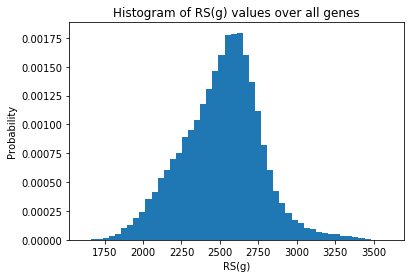

In [13]:
fig, ax = plt.subplots()

ax.hist(RS_g_values, bins=50, density=True)
ax.set_xlabel('RS(g)')
ax.set_ylabel('Probability')
ax.set_title('Histogram of RS(g) values over all genes')

plt.show()
fig.savefig('B6.png')

# C

In [14]:
results = {    
    'gene': [],
    'wrs': [],
    't_student': []
}

for i, gene_column in enumerate(df.columns[1:]):
    #create a sample vector
    results['gene'].append(gene_column)
    
    #Z(t) value, when t is sum of deg for this gene
    z_stat = (RS_g_values[i] - E)/S
    #update the gene's value
    results['wrs'].append(z_stat)
    
    #create a vector of values for each group: M or H
    x = df[df.Class == 'M'][gene_column].values
    y = df[df.Class == 'H'][gene_column].values
    
    # take the tow group of samples of the gene and put in ttest:
    t_stat, p_value = ttest_ind(x, y)
    results['t_student'].append(t_stat)
    
df_statistical_significance = pd.DataFrame.from_dict(results)
df_statistical_significance.head()

,gene,t_student,wrs
0,1007_s_at,-1.278585,-0.678870
1,1053_at,0.447602,1.420727
2,117_at,4.041393,4.633111
3,121_at,0.102599,0.972813
4,1255_g_at,0.481005,1.378735


Since we test 54628 genes, we are definatly in a risk of multipe-test issue. 
So, we are going to use the Sidack Correction for Familywise error rate correction.

In [15]:
alpha_5_prc = (0.05)
alpha = (1-((1-alpha_5_prc)**(1.0/54628)))
#using 
z_critical_right = norm.ppf(1 - alpha)
z_critical_left = norm.ppf(alpha)

wrs_underexpressed_genes = df_statistical_significance[df_statistical_significance.wrs < z_critical_left].gene
wrs_overexpressed_genes =  df_statistical_significance[df_statistical_significance.wrs > z_critical_right].gene

t_underexpressed_genes = df_statistical_significance[df_statistical_significance.t_student < z_critical_left].gene
t_overexpressed_genes =  df_statistical_significance[df_statistical_significance.t_student > z_critical_right].gene

In [16]:
print 'sidack alpha:', alpha
print
print 'WRS'
print 'Underexpressed_genes:', len(wrs_underexpressed_genes)
print(wrs_underexpressed_genes[1:5])
print 'Overexpressed_genes:', len(wrs_overexpressed_genes)
print
print 'T-Student'
print 'Underexpressed_genes:', len(t_underexpressed_genes)
print(t_underexpressed_genes[1:5])
print 'Overexpressed_genes:', len(t_overexpressed_genes)

sidack alpha: 9.38955669327e-07

WRS
Underexpressed_genes: 53
56      1552321_a_at
3431      1557113_at
6457    1562245_a_at
6740      1562697_at
Name: gene, dtype: object
Overexpressed_genes: 708

T-Student
Underexpressed_genes: 159
70      1552343_s_at
1331    1554116_s_at
2880    1556261_a_at
3181      1556728_at
Name: gene, dtype: object
Overexpressed_genes: 596


# D

In [17]:
# create a vector of all genes with 60 under and ober experssed by wrs
significant_genes = np.append(df_statistical_significance.sort_values(by='wrs', ascending=True)[:60].gene.values,
                              df_statistical_significance.sort_values(by='wrs', ascending=False)[:60].gene.values)


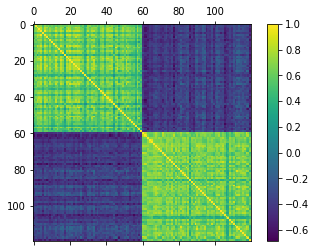

In [18]:
correlations = df[significant_genes].corr(method='spearman')
#print(type(correlations))
fig, ax = plt.subplots()

im = ax.matshow(correlations)
fig.colorbar(im)
plt.show()
fig.savefig('D.png')

In [19]:
from scipy.stats import spearmanr
a1 = spearmanr(df[significant_genes])
#print (a1[1][0])
alpha_5_prc = (0.05)
num_of_compares = 7140
alpha = (1-((1-alpha_5_prc)**(1.0/num_of_compares)))


corrGenes = []

for i in range (120):
    for j in range (120):
        if (a1[1][i][j] < alpha):
            corrGenes.append([i, j])

positivecount = 0
negativecount = 0

for val in corrGenes:
    if (val[0] < val[1]):
        #print "%s and %s are corollated with p-value %s" %(significant_genes[val[0]], significant_genes[val[1]], a1[1][val[0]][val[1]])
        if (a1[0][val[0]][val[1]] >0):
            positivecount +=1 
        else:
            negativecount +=1
            

print "There are %u pairs positively correlated. there are %u pairs negatively correlated. alpha=%s" %(positivecount, negativecount, alpha)  

There are 3186 pairs positively correlated. there are 1019 pairs negatively correlated. alpha=7.1839089838e-06


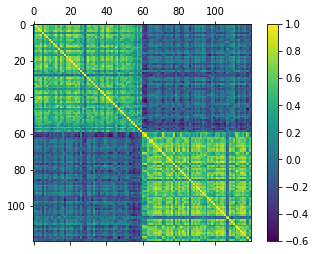

In [20]:
correlations = df[df.Class == 'M'][significant_genes].corr(method='spearman')

fig, ax = plt.subplots()

im = ax.matshow(correlations)
fig.colorbar(im)
plt.show()
fig.savefig('D3.png')

In [21]:
from scipy.stats import spearmanr
a1 = spearmanr(df[df.Class == 'M'][significant_genes])
#print (a1[1][0])
alpha_5_prc = (0.05)
num_of_compares = 7140
alpha = (1-((1-alpha_5_prc)**(1.0/num_of_compares)))


corrGenes = []

for i in range (120):
    for j in range (120):
        if (a1[1][i][j] < alpha):
            corrGenes.append([i, j])

positivecount = 0
negativecount = 0

for val in corrGenes:
    if (val[0] < val[1]):
        #print "%s and %s are corollated with p-value %s" %(significant_genes[val[0]], significant_genes[val[1]], a1[1][val[0]][val[1]])
        if (a1[0][val[0]][val[1]] >0):
            positivecount +=1 
        else:
            negativecount +=1
            

print "There are %u pairs positively correlated. there are %u pairs negatively correlated. alpha=%s" %(positivecount, negativecount, alpha)  

There are 1082 pairs positively correlated. there are 2 pairs negatively correlated. alpha=7.1839089838e-06


# E

Select 3 differentially expressed genes, from D (from 3.d), and produce a graphical representation of their expression patterns that demonstrates the observed DE

In [56]:
import scipy.stats as stats
def create_qqplot(x, y):
    arg1, xr = stats.probplot(x, fit=False)
    arg2, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr)

def graphical_representat(x, y):
    create_qqplot(np.arange(x.shape[0]), x)
    create_qqplot(np.arange(y.shape[0]), y)



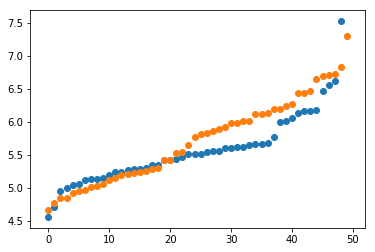

In [57]:
graphical_representat(df[df.Class == 'M'].iloc[:, 1], df[df.Class == 'H'].iloc[:, 1])

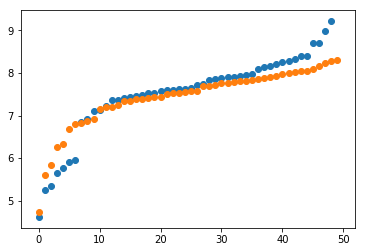

In [58]:
graphical_representat(df[df.Class == 'M'].iloc[:, 2], df[df.Class == 'H'].iloc[:, 2])

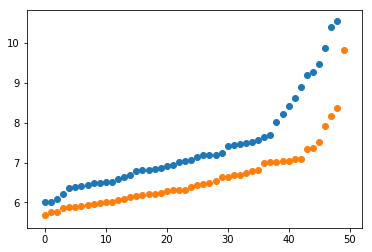

In [59]:
graphical_representat(df[df.Class == 'M'].iloc[:, 3], df[df.Class == 'H'].iloc[:, 3])